In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


In [47]:
df = pd.read_csv("combined_100data.csv")  

In [48]:
df.columns = df.columns.str.strip()  # Optional: Clean extra spaces in column names
numeric_columns = ['Year','GDP per Capita', 'Hospital Beds', 'Doctors per 1000', 'Smoking Rate', 'Elderly (%)']
for col in numeric_columns:
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)#to remove commas

In [49]:
df.head()

,Year,Population,Elderly (%),GDP per Capita,Hospital Beds,Doctors per 1000,Smoking Rate,Mortality Rate,Life Expectancy
0,1980.0,621958,13.995083,34354.567126,2.718199,2.118132,31.152531,13.163857,78.420562
1,1981.0,1171155,12.903005,27015.794583,3.416274,2.551891,17.461725,14.679738,73.943557
2,1982.0,631932,23.533177,22941.375064,5.367519,2.347553,19.907576,5.884082,74.663386
3,1983.0,865838,19.545440,28091.761364,4.354182,3.331675,23.033555,12.918178,74.111464
4,1984.0,759178,11.530815,30042.139470,4.552223,3.332755,17.610465,10.899559,69.469316


In [50]:
features = ['Year','GDP per Capita', 'Hospital Beds', 'Doctors per 1000', 'Smoking Rate', 'Elderly (%)']
X = df[features]
y_mort = df['Mortality Rate']
y_life = df['Life Expectancy']



In [51]:
X_train, X_test, y_mort_train, y_mort_test, y_life_train, y_life_test = train_test_split(
    X, y_mort, y_life, test_size=0.2, random_state=42
)


In [52]:
columns_to_clean = ['GDP per Capita', 'Hospital Beds', 'Doctors per 1000', 'Smoking Rate', 'Elderly (%)', 'Population', 'Year']

for col in columns_to_clean:
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)

In [53]:
#Train Models

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_mort = LinearRegression()
model_life = LinearRegression()

model_mort.fit(X_train_scaled, y_mort_train)
model_life.fit(X_train_scaled, y_life_train)


LinearRegression()

In [54]:
#Make Predictions
y_mort_pred = model_mort.predict(X_test_scaled)
y_life_pred = model_life.predict(X_test_scaled)

In [55]:
test_years = df.loc[y_mort_test.index, 'Year']
# plotting
mort_plot_df = pd.DataFrame({
    'Year': test_years,
    'Actual': y_mort_test.values,
    'Predicted': y_mort_pred
}).sort_values(by='Year')

life_plot_df = pd.DataFrame({
    'Year': test_years,
    'Actual': y_life_test.values,
    'Predicted': y_life_pred
}).sort_values(by='Year')

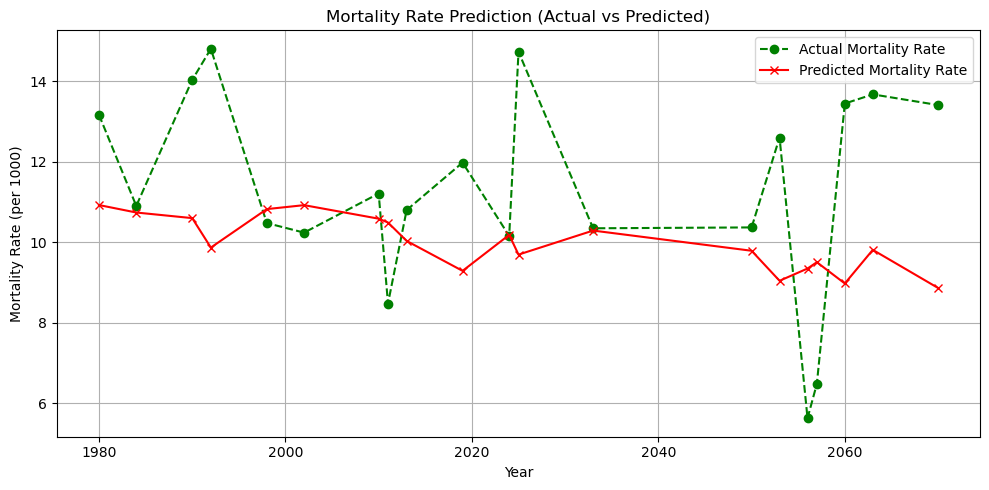

In [56]:
# Plot of Actual and Predicted Mortality Rate
plt.figure(figsize=(10, 5))
plt.plot(mort_plot_df['Year'], mort_plot_df['Actual'], marker='o', linestyle='--', label='Actual Mortality Rate', color='green')
plt.plot(mort_plot_df['Year'], mort_plot_df['Predicted'], marker='x', linestyle='-', label='Predicted Mortality Rate', color='red')
plt.title("Mortality Rate Prediction (Actual vs Predicted)")
plt.xlabel("Year")
plt.ylabel("Mortality Rate (per 1000)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


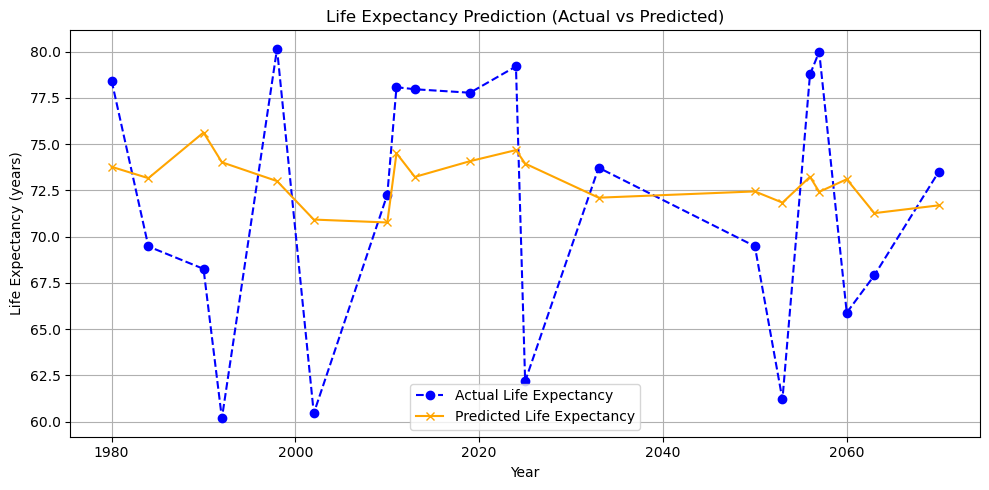

In [57]:
# plot of Actual and Predicted Life Expectancy
plt.figure(figsize=(10, 5))
plt.plot(life_plot_df['Year'], life_plot_df['Actual'], marker='o', linestyle='--', label='Actual Life Expectancy', color='blue')
plt.plot(life_plot_df['Year'], life_plot_df['Predicted'], marker='x', linestyle='-', label='Predicted Life Expectancy', color='orange')
plt.title("Life Expectancy Prediction (Actual vs Predicted)")
plt.xlabel("Year")
plt.ylabel("Life Expectancy (years)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [58]:
#  Predict for Custom Input

while True:#restrict input
    try:
        year = float(input("Year (upto 2150): "))
        if 1900 <= year <= 2150:
            break
        else:
            print("  enter  year between 1900 and 2150.")
    except ValueError:
        print("❌ Invalid input. Please enter a number.")
  
custom_data = {
    "Year": year,
    "Population": int(input("Population (e.g., 125000000): ")),
    "Elderly (%)": float(input("Elderly Population % (e.g., 30.0): ")),
    "GDP per Capita": float(input("GDP per Capita (e.g., 50000): ")),
    "Hospital Beds": float(input("Hospital Beds per 1000 (e.g., 13.0): ")),
    "Doctors per 1000": float(input("Doctors per 1000 (e.g., 2.5): ")),
    "Smoking Rate": float(input("Smoking Rate % (e.g., 18.0): "))
}




In [59]:
# Convert to DataFrame and scale
custom_input_df = pd.DataFrame([custom_data])
custom_input_features = custom_input_df[features] 
custom_input_scaled = scaler.transform(custom_input_features)

In [60]:
# Predict
mortality_prediction = model_mort.predict(custom_input_scaled)[0]
life_expectancy_prediction = model_life.predict(custom_input_scaled)[0]

In [61]:
# Output
print(f"\n📅 You entered data for Year: {year}")
print(f"🔮 Predicted Mortality Rate: {mortality_prediction:.2f} per 1,000 people")
print(f"🔮 Predicted Life Expectancy: {life_expectancy_prediction:.2f} years")


📅 You entered data for Year: 2056.0
🔮 Predicted Mortality Rate: 7.81 per 1,000 people
🔮 Predicted Life Expectancy: 75.21 years


In [62]:
#  Plot Mortality with Custom Input
custom_year = custom_data['Year']
mortality_pred_df = pd.DataFrame({
    'Year': [custom_year],
    'Mortality Rate': [mortality_prediction]
})

In [63]:
# Combine with existing test prediction data
df_mort_plot = pd.concat([
    mort_plot_df[['Year', 'Actual']].rename(columns={'Actual': 'Mortality Rate'}),
    mortality_pred_df
], ignore_index=True).sort_values(by='Year')

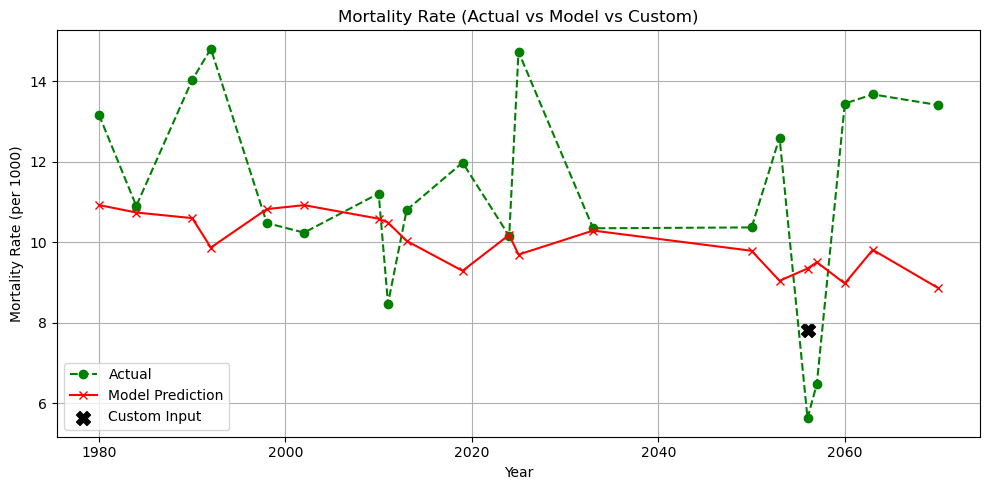

In [64]:
plt.figure(figsize=(10, 5))
plt.plot(mort_plot_df['Year'], mort_plot_df['Actual'], linestyle='--', marker='o', color='green', label='Actual')
plt.plot(mort_plot_df['Year'], mort_plot_df['Predicted'], linestyle='-', marker='x', color='red', label='Model Prediction')
plt.scatter(custom_year, mortality_prediction, color='black', marker='X', s=100, label='Custom Input')
plt.title("Mortality Rate (Actual vs Model vs Custom)")
plt.xlabel("Year")
plt.ylabel("Mortality Rate (per 1000)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [65]:
#  Append and Plot Life Expectancy with Custom Input ---
life_exp_pred_df = pd.DataFrame({
    'Year': [custom_year],
    'Life Expectancy': [life_expectancy_prediction]
})

In [66]:
df_life_plot = pd.concat([
    life_plot_df[['Year', 'Actual']].rename(columns={'Actual': 'Life Expectancy'}),
    life_exp_pred_df
], ignore_index=True).sort_values(by='Year')

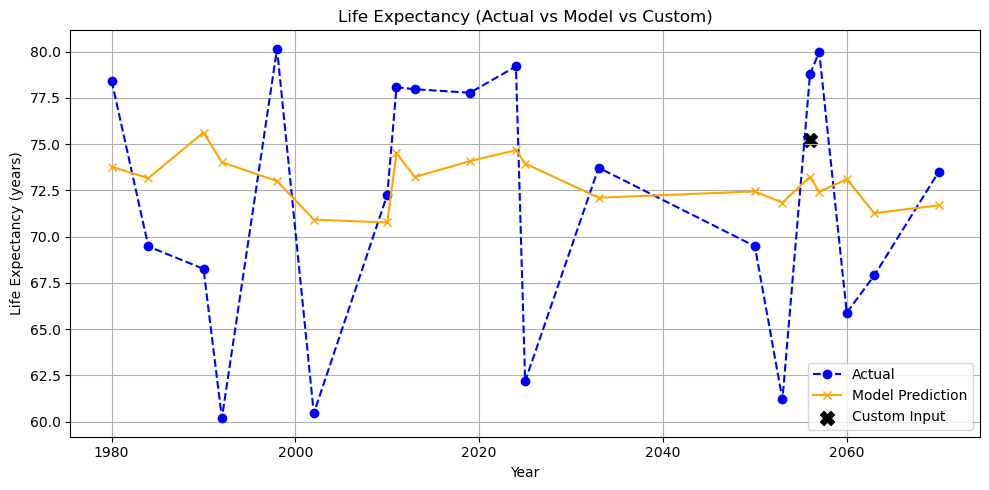

In [67]:

plt.figure(figsize=(10, 5))
plt.plot(life_plot_df['Year'], life_plot_df['Actual'], linestyle='--', marker='o', color='blue', label='Actual')
plt.plot(life_plot_df['Year'], life_plot_df['Predicted'], linestyle='-', marker='x', color='orange', label='Model Prediction')
plt.scatter(custom_year, life_expectancy_prediction, color='black', marker='X', s=100, label='Custom Input')
plt.title("Life Expectancy (Actual vs Model vs Custom)")
plt.xlabel("Year")
plt.ylabel("Life Expectancy (years)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
